In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Household_data.csv')  # Replace 'your_dataset.csv' with the actual filename

# Find rows where the 'area' column contains the string 'Mainz, St.'
mainz_rows = df[df['area'].str.contains('Mainz, St.', case=False, na=False)]

# Display the resulting DataFrame
print(mainz_rows)

# Function to create a 1D array representation of an adjacency matrix
def create_1d_adjacency_matrix(num_nodes, edges):
    adj_matrix_1d = np.zeros(num_nodes * num_nodes, dtype=int)

    for edge in edges:
        source, target = edge
        # Assuming an undirected graph, so set both source->target and target->source
        adj_matrix_1d[source * num_nodes + target] = 1
        adj_matrix_1d[target * num_nodes + source] = 1

    return adj_matrix_1d

# Function to create a 2D array representation of an adjacency matrix
def create_2d_adjacency_matrix(num_nodes, edges):
    adj_matrix_2d = np.zeros((num_nodes, num_nodes), dtype=int)

    for edge in edges:
        source, target = edge
        # Assuming an undirected graph, so set both source->target and target->source
        adj_matrix_2d[source][target] = 1
        adj_matrix_2d[target][source] = 1

    return adj_matrix_2d

# Example usage
num_nodes_example = 4
edges_example = [(0, 1), (1, 2), (2, 3), (3, 0)]

# Create 1D array representation
adj_matrix_1d_example = create_1d_adjacency_matrix(num_nodes_example, edges_example)
print("1D Adjacency Matrix:")
print(adj_matrix_1d_example)

# Create 2D array representation
adj_matrix_2d_example = create_2d_adjacency_matrix(num_nodes_example, edges_example)
print("\n2D Adjacency Matrix:")
print(adj_matrix_2d_example)




         area  total_Person  Single_Person  Two_Person  Three_Person  \
5  Mainz, St.        102528          47263       30875         12069   

   Four_Person  Five_Person  Six_Person  
5         8137         2785        1399  
1D Adjacency Matrix:
[0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0]

2D Adjacency Matrix:
[[0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]]


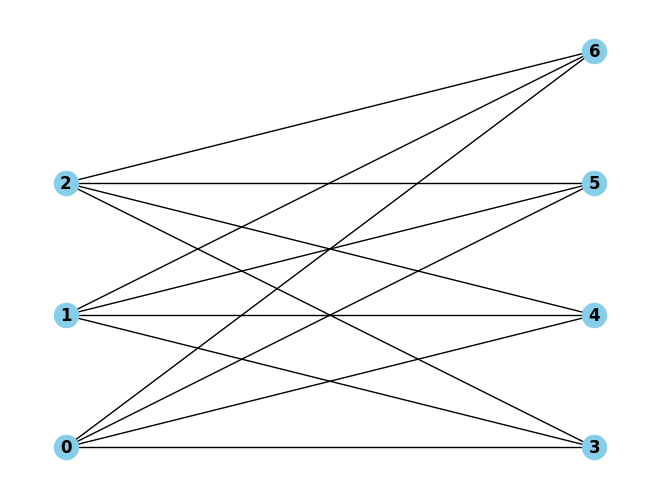

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate a bipartite graph
B = nx.complete_bipartite_graph(3, 4)

# Get the sets of nodes
U, V = nx.bipartite.sets(B)

# Create the bipartite layout
pos = dict()
pos.update((node, (1, index)) for index, node in enumerate(U))
pos.update((node, (2, index)) for index, node in enumerate(V))

# Plot the bipartite graph
nx.draw(B, pos, with_labels=True, font_weight='bold', node_color='skyblue')
plt.show()

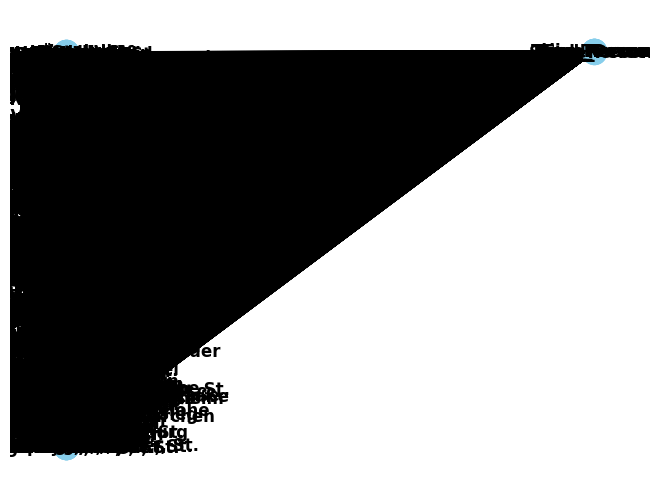

In [16]:
# Extract relevant columns for bipartite graph
bipartite_data = df[['area', 'total_Person', 'Single_Person', 'Two_Person', 'Three_Person', 'Four_Person', 'Five_Person', 'Six_Person']]

# Create a bipartite graph
B = nx.Graph()

# Add nodes from the 'area' column (Assuming 'area' is one set of nodes)
B.add_nodes_from(bipartite_data['area'], bipartite='area')

# Add nodes from the other columns (Assuming the rest are the other set of nodes)
B.add_nodes_from(bipartite_data.columns[1:], bipartite='person')

# Add edges between 'area' and other nodes
for _, row in bipartite_data.iterrows():
    area_name = row['area']
    for person_category in bipartite_data.columns[1:]:
        B.add_edge(area_name, person_category)

# Create a layout for visualization
pos = {
    node: (1, index) if 'area' in B.nodes[node]['bipartite'] else (2, index)
    for index, node in enumerate(B.nodes)
}

# Plot the bipartite graph
nx.draw(B, pos, with_labels=True, font_weight='bold', node_color='skyblue')
plt.show()